<a href="https://colab.research.google.com/github/mralamdari/CV-Object-Detection-Projects/blob/main/Flower_Recognition_Challenges_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
from matplotlib import style

import matplotlib.pyplot as plt
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from PIL import Image
import tensorflow as tf
from sklearn import preprocessing, model_selection, metrics, decomposition

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip \*.zip && rm *.zip

In [ ]:
path_folder = '/content/flowers'

size = 224
x_train, x_test = [], []
y_train, y_test = [], []
id = 0
for folder in tqdm.tqdm(os.listdir(path_folder)):
  for files in tqdm.tqdm(os.listdir(os.path.join(path_folder, folder))):
    if files.endswith('jpg'):
      img_path = os.path.join(path_folder, folder, files)
      img = cv2.imread(img_path, cv2.IMREAD_COLOR)
      im = cv2.resize(img, (size, size))
      im = np.array(im) / 255
      if np.random.rand() < 0.25:
        x_test.append(im)
        y_test.append(folder)
      else:
        x_train.append(im)
        y_train.append(folder)

      id += 1
    else:
      continue

In [4]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_test = tf.keras.utils.to_categorical(y_test, 5)

In [5]:
c = list(zip(x_train, y_train))
np.random.shuffle(c)
x_train, y_train = zip(*c)

In [6]:
c = list(zip(x_test, y_test))
np.random.shuffle(c)
x_test, y_test = zip(*c)

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [8]:
x_train.shape, x_test.shape

((3278, 224, 224, 3), (1039, 224, 224, 3))

In [ ]:
y_test[:10]

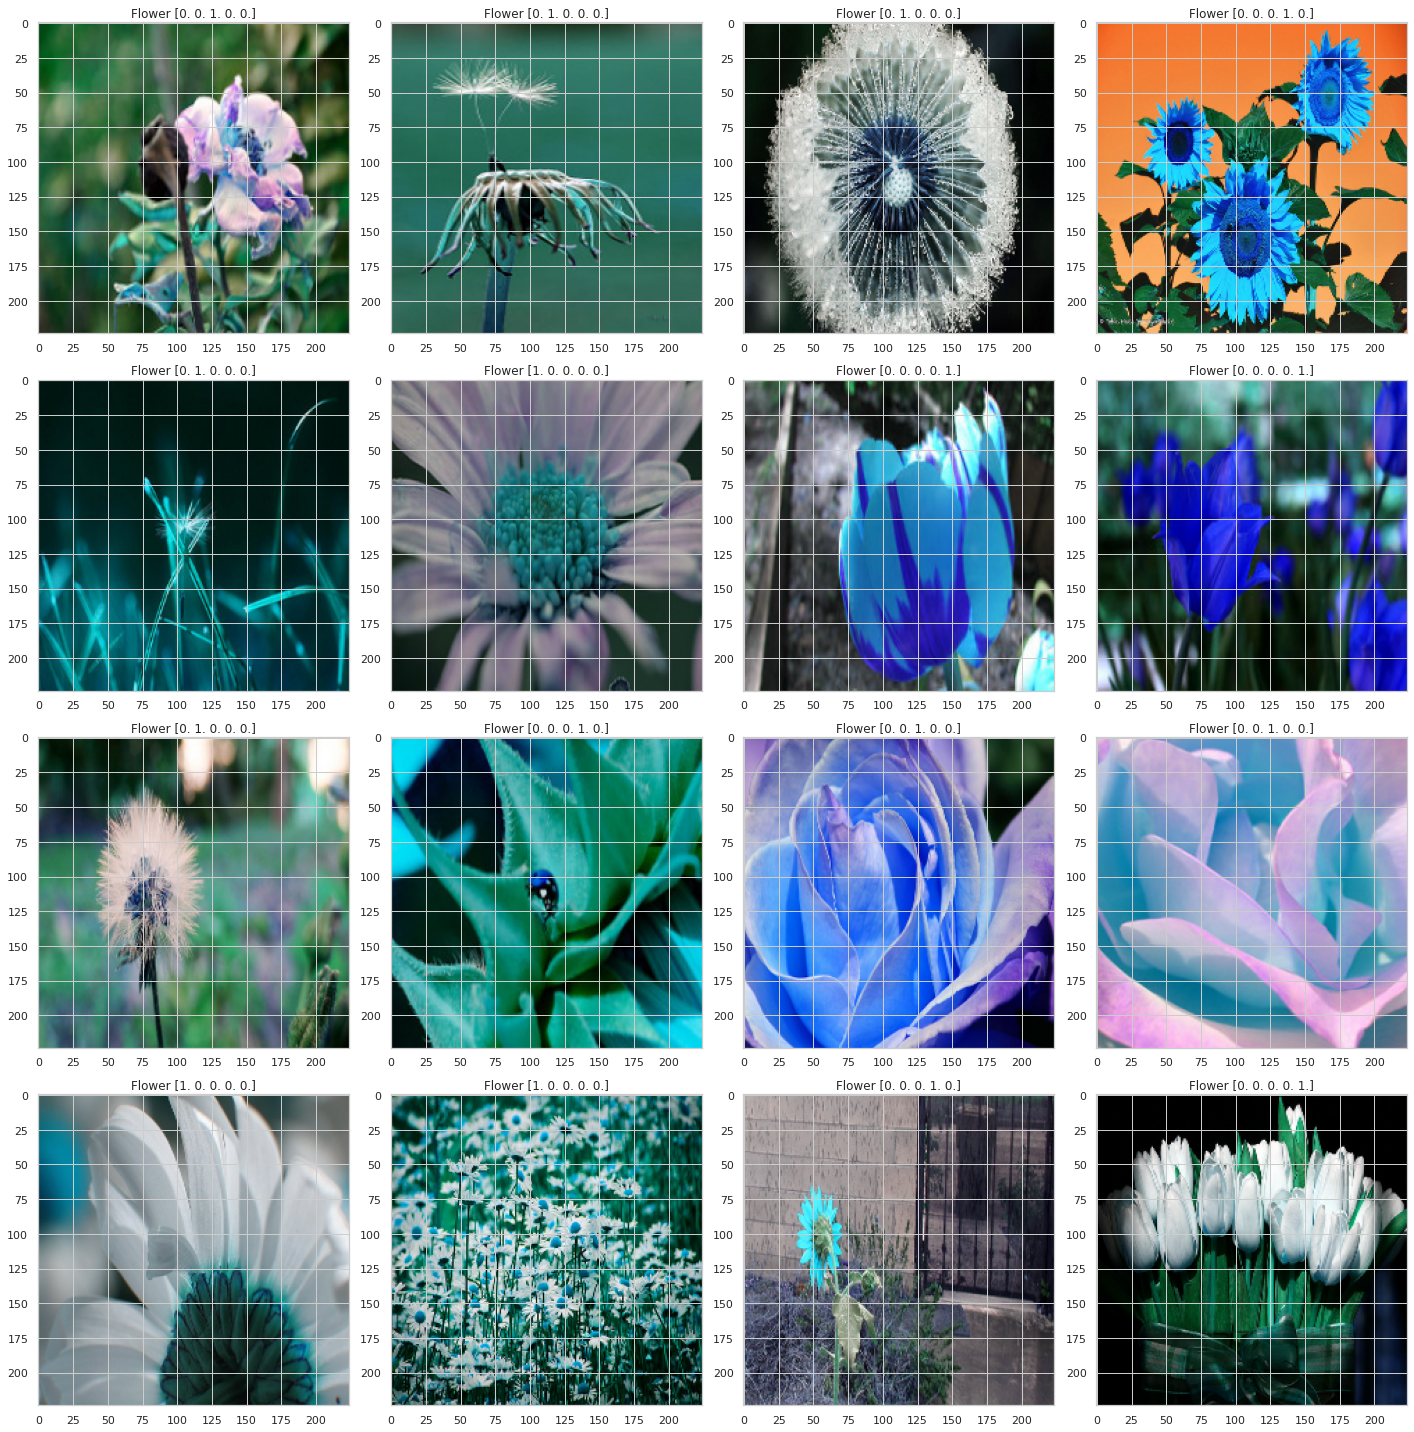

In [12]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(20, 20)
for i in range(4):
  for j in range(4):
    rnd = np.random.randint(0, len(x_train), 1)[0]
    ax[i, j].imshow(x_train[rnd])
    ax[i, j].set_title(f'Flower {y_train[rnd]}')
plt.tight_layout()